In [1]:
import pandas as pd
import plotly.graph_objects as go
from pathlib import Path

In [11]:
def plot_spectra(data_dir, parameters, field, monitor):
    """
    Plot spectra for multiple parameter sets. 
    Single Monitor, single field
    """
    fig = go.Figure()
    
    # Loop through each parameter set ##### ===== #####
    for param in parameters:
        # Construct file path
        file_path = Path(data_dir) / f"data_{param}" / "spectra" / f"{field}_{monitor}_spectrum.csv"
        # file_path = Path(data_dir) / f"data_{param}" / "spectra" / f"{field}_{monitor}.csv"

        
        # Read CSV file
        df = pd.read_csv(file_path)
        
        # Add trace to plot
        fig.add_trace(go.Scatter(
            x=df.iloc[:, 0],  # First column (energy/wavelength)
            y=df.iloc[:, 1],  # Second column (intensity)
            mode='lines',
            name=param
        ))
    
    # Update layout
    fig.update_layout(
        title=f"{field} - {monitor}",
        xaxis_title="Energy (eV)",
        yaxis_title="Spectrum",
        hovermode='x unified',
        # legend=dict(x=0.02, y=0.98, # top-left position
        #             bgcolor='rgba(255,255,255,0.8)'),
        # legend=dict(x=1, y=0, xanchor='right', yanchor='top', # legend position
                    # bgcolor='rgba(255,255,255,0.8)'), 
        width=600,
        height=600
    )
    
    # Create output filename
    # output_name = f"{field}_{monitor}_{'_'.join(parameters)}"
    output_name = f"{field}_{monitor}"
    
    # Save as HTML and PNG
    fig.write_html(f"{output_name}.html")
    # fig.write_image(f"{output_name}.png")
    
    return fig


In [14]:
# Example usage:
Monitors = [
'DFT_out_plane',
'DFT_in_plane_centre',
'DFT_in_plane_bottom',
# 'DFT_out_plane_OFFSET',
# 'DFT_in_plane_centre_OFFSET',
# 'DFT_in_plane_bottom_OFFSET',
]

Parameters = [
            "miniMon_dipolEx_L100_Hxyz",
    
            # 'miniMonExL25_rand',
            # 'miniMonExL25_centre',
            # 'miniMonExL25_edge',
            
            # 'miniMonEzL25_rand',
            # 'miniMonEzL25_centre',
            # 'miniMonEzL25_edge',
            
            # 'miniMonExL100_rand',
            # 'miniMonExL100_centre',
            # 'miniMonExL100_edge',
            
            # 'miniMonEzL100_rand',
            # 'miniMonEzL100_centre',
            # 'miniMonEzL100_edge',
             ]


# Parameters = ["APO4", "APO8", 
#               # "apo","apo_long",
#               "shutoff_dis",
#               "original","original_long"]

for mon in Monitors:
    plot_spectra(
            data_dir=".",
            # data_dir = "/app/local_project/siHoles_offset",
            parameters=Parameters,
            field="Hy",
            monitor=mon
        )

In [17]:
def plot_all_spectra(data_dir, parameters, fields, monitors):
    """
    Plot spectra for multiple parameter sets, fields, and monitors on one graph.
    """
    fig = go.Figure()

    # # Define base colors for each parameter
    # param_colors = {
    #     'miniMonExL25_rand': 'rgb(255, 0, 0)',      # Red
    #     'miniMonExL25_centre': 'rgb(0, 0, 255)',    # Blue
    #     'miniMonExL25_edge': 'rgb(0, 200, 0)'       # Green
    # }
    
    # # Define opacity for each field (Ex lighter, Ez darker)
    # field_opacity = {
    #     'Ex': 0.4,   # Lightest
    #     'Ey': 0.7,   # Medium
    #     'Ez': 1.0    # Darkest
    # }
    
    # Loop through fields, monitors, and parameters
    for field in fields:
        for monitor in monitors:
            for param in parameters:
                # Construct file path
                file_path = Path(data_dir) / f"data_{param}" / "spectra" / f"{field}_{monitor}_spectrum.csv"
                
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Get color and opacity
                # color = param_colors[param]
                # opacity = field_opacity[field]
                # Convert rgb to rgba with opacity
                # rgba_color = color.replace('rgb', 'rgba').replace(')', f', {opacity})')
                
                # Add trace with descriptive name
                fig.add_trace(go.Scatter(
                    x=df.iloc[:, 0],
                    y=df.iloc[:, 1],
                    mode='lines',
                    name=f"{field}_{monitor}_{param}",
                    # name=f"{field}_{monitor}",

                    # line=dict(color=rgba_color)
                ))
    
    # Update layout
    fig.update_layout(
        title="All Spectra",
        xaxis_title="Energy (eV)",
        yaxis_title="Spectrum",
        hovermode='x unified',
        # width=600,
        # height=600
    )
    

    # Create output filename
    output_name = f"{fields}_{''.join(parameters)}"
    fig.write_html(f"{output_name}.html")
    return fig

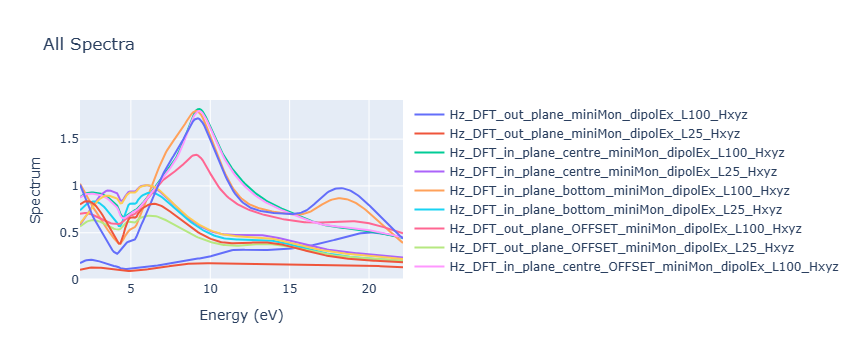

In [20]:
# Usage
fields = [
# "Ex", 
# "Ey", 
# "Ez",
# "Hx",
# "Hy",
# "Hz"
         ]
monitors = [
'DFT_out_plane',
'DFT_in_plane_centre',
'DFT_in_plane_bottom',
'DFT_out_plane_OFFSET',
'DFT_in_plane_centre_OFFSET',
'DFT_in_plane_bottom_OFFSET',
]

Parameters = [
# 'miniMonExL25_rand',
# 'miniMonExL25_centre',
'miniMon_dipolEx_L100_Hxyz',
'miniMon_dipolEx_L25_Hxyz',
             ]


plot_all_spectra(".", Parameters, fields, monitors)

In [66]:
# Define base colors for different monitor groups
MONITOR_COLORS = {
    'DFT_in_plane_centre': 'rgb(31, 119, 180)',    # Blue
    'DFT_in_plane_slice': 'rgb(255, 127, 14)',     # Orange (base for all slices)
    'DFT_in_plane_bottom': 'rgb(44, 160, 44)',     # Green
    'DFT_in_plane_sumofFive': 'rgb(214, 39, 40)',  # Red
    'DFT_out_plane': 'rgb(148, 103, 189)',         # Purple
}

# Define line styles for different monitor groups
MONITOR_LINE_STYLES = {
    'DFT_in_plane_centre': dict(width=2),
    'DFT_in_plane_slice': dict(width=2, dash='dot'),  # Dotted for slices
    'DFT_in_plane_bottom': dict(width=2),
    'DFT_in_plane_sumofFive': dict(width=2, dash='dash'),
    'DFT_out_plane': dict(width=2),
}


def adjust_lightness(rgb_string, lightness_factor):
    """
    Adjust the lightness of an RGB color.
    lightness_factor: 0.5 = darker, 1.0 = original, 1.5 = lighter
    """
    # Extract RGB values from string like 'rgb(255, 0, 0)'
    rgb_values = rgb_string.replace('rgb(', '').replace(')', '').split(',')
    r, g, b = [int(x.strip()) for x in rgb_values]
    
    # Convert to HSL-like adjustment
    # Simple approach: interpolate towards white (lighter) or black (darker)
    if lightness_factor > 1.0:
        # Lighter: interpolate towards white (255, 255, 255)
        factor = lightness_factor - 1.0
        r = int(r + (255 - r) * factor * 0.5)
        g = int(g + (255 - g) * factor * 0.5)
        b = int(b + (255 - b) * factor * 0.5)
    else:
        # Darker: interpolate towards black (0, 0, 0)
        r = int(r * lightness_factor)
        g = int(g * lightness_factor)
        b = int(b * lightness_factor)
    
    # Clamp values
    r, g, b = max(0, min(255, r)), max(0, min(255, g)), max(0, min(255, b))
    
    return f'rgb({r}, {g}, {b})'

In [85]:
def plot_color_spectra(data_dir, parameters, fields, monitors, 
                     monitor_colors=None, monitor_line_styles=None):
    """
    Plot spectra for multiple parameter sets, fields, and monitors on one graph.
    Slice monitors share the same base color with varying lightness.
    """
    fig = go.Figure()
    # Create output filename
    output_name = f"{parameters}_{''.join(fields)}"
    
    # Use global defaults if not provided
    if monitor_colors is None:
        monitor_colors = MONITOR_COLORS
    if monitor_line_styles is None:
        monitor_line_styles = MONITOR_LINE_STYLES
    
    # Identify slice monitors and assign lightness factors
    slice_monitors = [m for m in monitors if 'slice' in m]
    slice_lightness = {}
    if slice_monitors:
        n_slices = len(slice_monitors)
        # Create lightness range from darker to lighter
        for i, monitor in enumerate(slice_monitors):
            # Range from 0.6 (darker) to 1.4 (lighter)
            slice_lightness[monitor] = 0.6 + (i / max(n_slices - 1, 1)) * 0.8

    
    # Loop through fields, monitors, and parameters
    for field in fields:
        for monitor in monitors:
            for param in parameters:
                # Construct file path
                file_path = Path(data_dir) / f"data_{param}" / "spectra" / f"{field}_{monitor}_spectrum.csv"
                
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Determine color and line style based on monitor type
                if 'slice' in monitor:
                    base_color = monitor_colors['DFT_in_plane_slice']
                    lightness = slice_lightness[monitor]
                    color = adjust_lightness(base_color, lightness)
                    line_style = monitor_line_styles.get('DFT_in_plane_slice', {})
                else:
                    color = monitor_colors.get(monitor, 'rgb(127, 127, 127)')
                    line_style = monitor_line_styles.get(monitor, {})
                
                # Combine color with line style
                line_dict = {'color': color, **line_style}
                
                # Add trace with descriptive name
                fig.add_trace(go.Scatter(
                    x=df.iloc[:, 0],
                    y=df.iloc[:, 1],
                    mode='lines',
                    name=f"{field}_{monitor}",
                    line=line_dict
                ))
    
    # Update layout
    fig.update_layout(
        title=f"{output_name} Spectra",
        xaxis_title="Energy (eV)",
        yaxis_title="Spectrum",
        hovermode='x unified',
        width=600,
        height=600
    )
    
    # export to html automatically
    fig.write_html(f"{output_name}.html")
    return fig


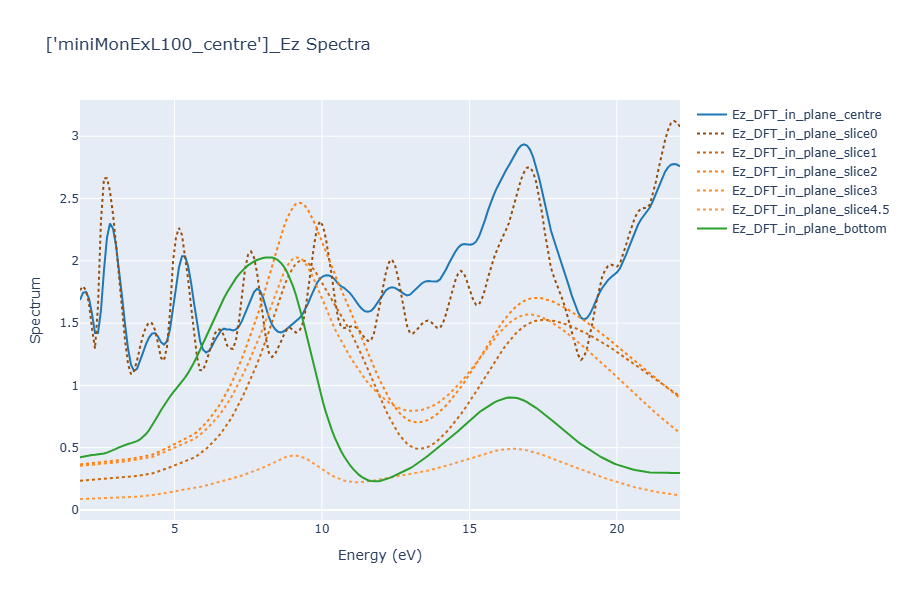

In [86]:
# Usage
Parameters = [
    # 'miniMonExL100_rand',
    'miniMonExL100_centre',
    # 'miniMonExL100_edge'
]

fields = [
    # "Ex", 
    # "Ey", 
    "Ez"
]
monitors = [
    'DFT_in_plane_centre',
    
    'DFT_in_plane_slice0',
    'DFT_in_plane_slice1',
    'DFT_in_plane_slice2',
    'DFT_in_plane_slice3',
    'DFT_in_plane_slice4.5',
    
    'DFT_in_plane_bottom',
    # 'DFT_in_plane_sumofFive',
    # 'DFT_out_plane',
]


plot_color_spectra(".", Parameters, fields, monitors)